# Problem Statement / Business Case

Hiring and retaining employees are extremely complex tasks that require capital ,time and skills. Here, I will be developing a model for HR department that could predict which employees are more likely to quit.

## Facts regarding the problem statement

- One of the major task for HR depratment is retain the top talent.
- Small business owners spen 40% of their working time on tasks that do not generate any income such as hiring.
- Companies spend 15%-20% of the employee's salary to recruit a new candidate.
- It takes 52 days on average to fill a position
- An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring  new hire up to speed.

## Workflow

- Data Sourcing
    - Import libraries and Datasets
- EDA
    - Visualize Dataset
- Data Preparation
    - Data Cleaning
    - Splitting into train and test
- Modelling (Classification)
    - Training and Evaluate Logistic classifier
    - Training and Evaluate Random Forest classifie
    - Training and Evaluate Deep Learning Model

## DataSet

- Here you can find the dataset: [HR - Analytics - Dataset - IBM - Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- Target Variable / Dependent variable : "Attrition"


### Data Sourcing 

#### Import libraries and Datasets

In [201]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf

In [88]:
# Loading the dataset
employee_df = pd.read_csv("D:\\github\\1-DataSets\\DatScience For Business\\Human_Resources.csv")

In [89]:
# Looking at the first few rows of the data
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [90]:
# information of the data frame - size, data types, shape 
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [91]:
# Summary statistics of the data set
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### EDA

#### Visualize Dataset

In [92]:
# Before performing any visulizations, lets convert few attributes (attrition, overtime, over 18) into integers

print(employee_df[['Attrition','OverTime','Over18']].head())

employee_df['Attrition'] = employee_df['Attrition'].map({'Yes':1,"No":0})
employee_df['OverTime'] = employee_df['OverTime'].map({'Yes':1,"No":0})
employee_df['Over18'] = employee_df['Over18'].map({'Y':1,"N":0})

print('-'*30)
print(employee_df[['Attrition','OverTime','Over18']].head())

  Attrition OverTime Over18
0       Yes      Yes      Y
1        No       No      Y
2       Yes      Yes      Y
3        No      Yes      Y
4        No       No      Y
------------------------------
   Attrition  OverTime  Over18
0          1         1       1
1          0         0       1
2          1         1       1
3          0         1       1
4          0         0       1


#### Missing data

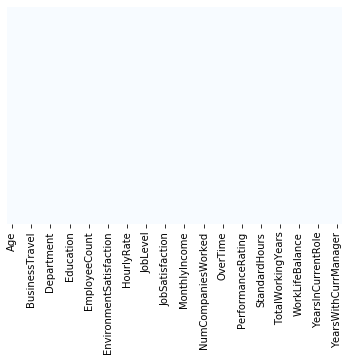

In [98]:
# Let's check for missing data
sns.heatmap(employee_df.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='Blues')

In [99]:
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

------------ From the heatmap, above data frame we can see that there are no null values/empty fields in the data ------------

#### Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA8529B888>,
      dtype=object)

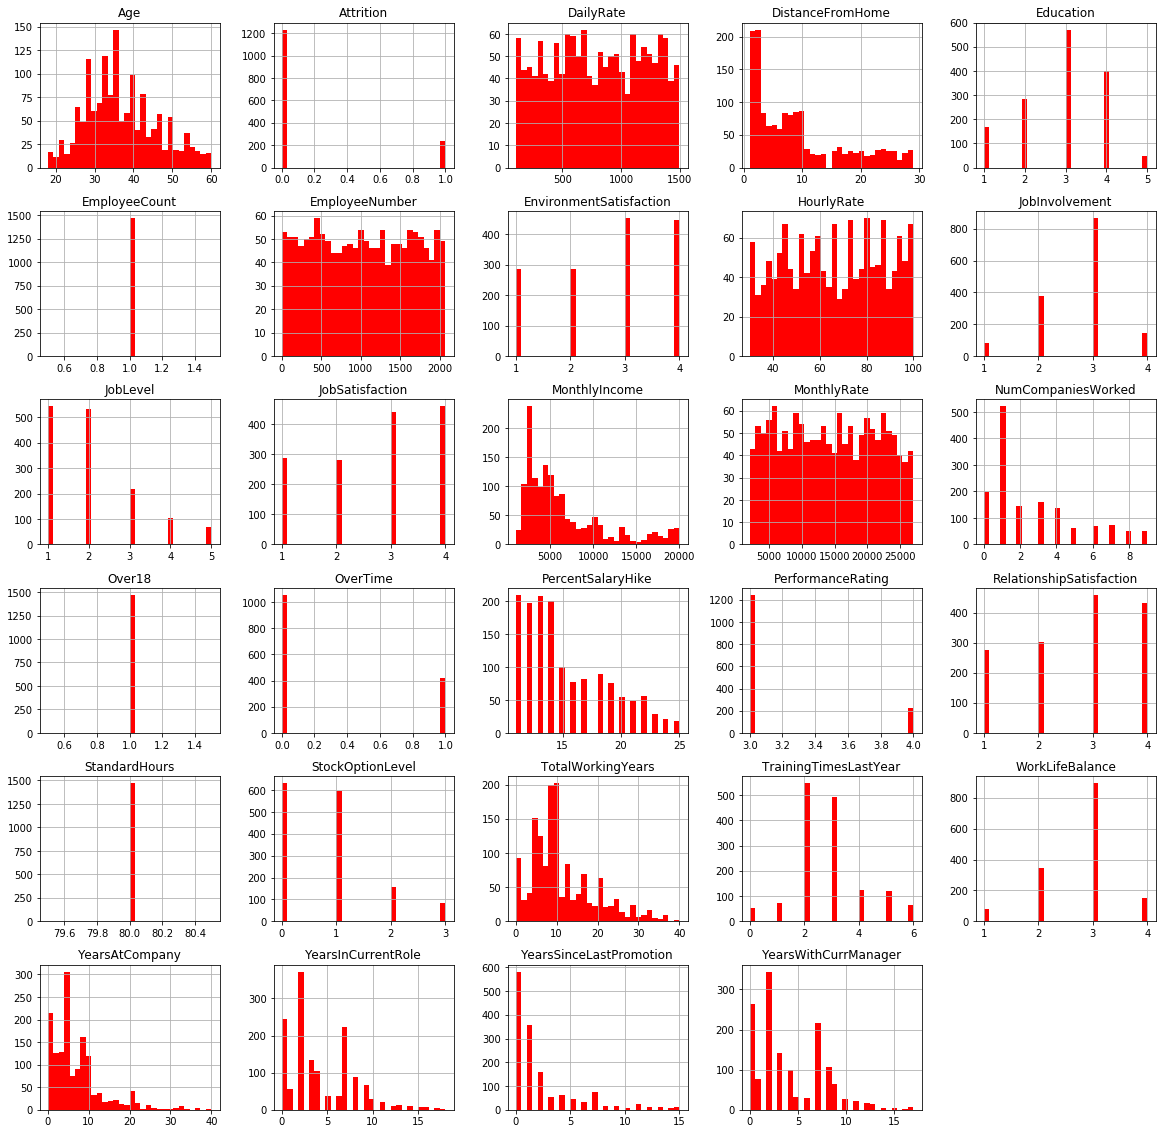

In [100]:
employee_df.hist(bins=30,
                figsize=(20,20),
                color='r')

From the plot we can say that:
- Age attribute is normally distributed
- Monthly Income, Total Working Years, Percent Salary Hike, YeasATCompnay, DistanceFromHome are heavily tailed
- Columns like StandardHours, Over 18, EmployeeCount, EmployeeNumber doest have any variance and not contributing. So we can drop them

#### Dropping Columns

In [101]:
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],
                axis=1,
                inplace=True)

#### Target Variable

In [102]:
left_df = employee_df[employee_df['Attrition']==1]
stayed_df = employee_df[employee_df['Attrition']==0]

In [104]:
print('Total No. of employees ',len(employee_df))
print('Number of employees who left= ',len(left_df))
print('% of employees who left= ',(len(left_df)/len(employee_df))*100,'%')
print('Number of employees who stayed= ',len(stayed_df))
print('% of employees who stayed= ',(len(stayed_df)/len(employee_df))*100,'%')

Total No. of employees  1470
Number of employees who left=  237
% of employees who left=  16.122448979591837 %
Number of employees who stayed=  1233
% of employees who stayed=  83.87755102040816 %


In [105]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [106]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


By comparing the above two data frames(stayed, left), we can say that:
- 'age': Mean age of the employees who stayed is higher compared to who left
- 'DailyRate': Rate of the employees who stayed is higher
- 'Distance From Home': Employees who stayed live closer to home
- 'Envoirment Satisfaction & Job Satisfaction': Employees who stayed are generally more staisfied with their jobs 

#### Correlation 

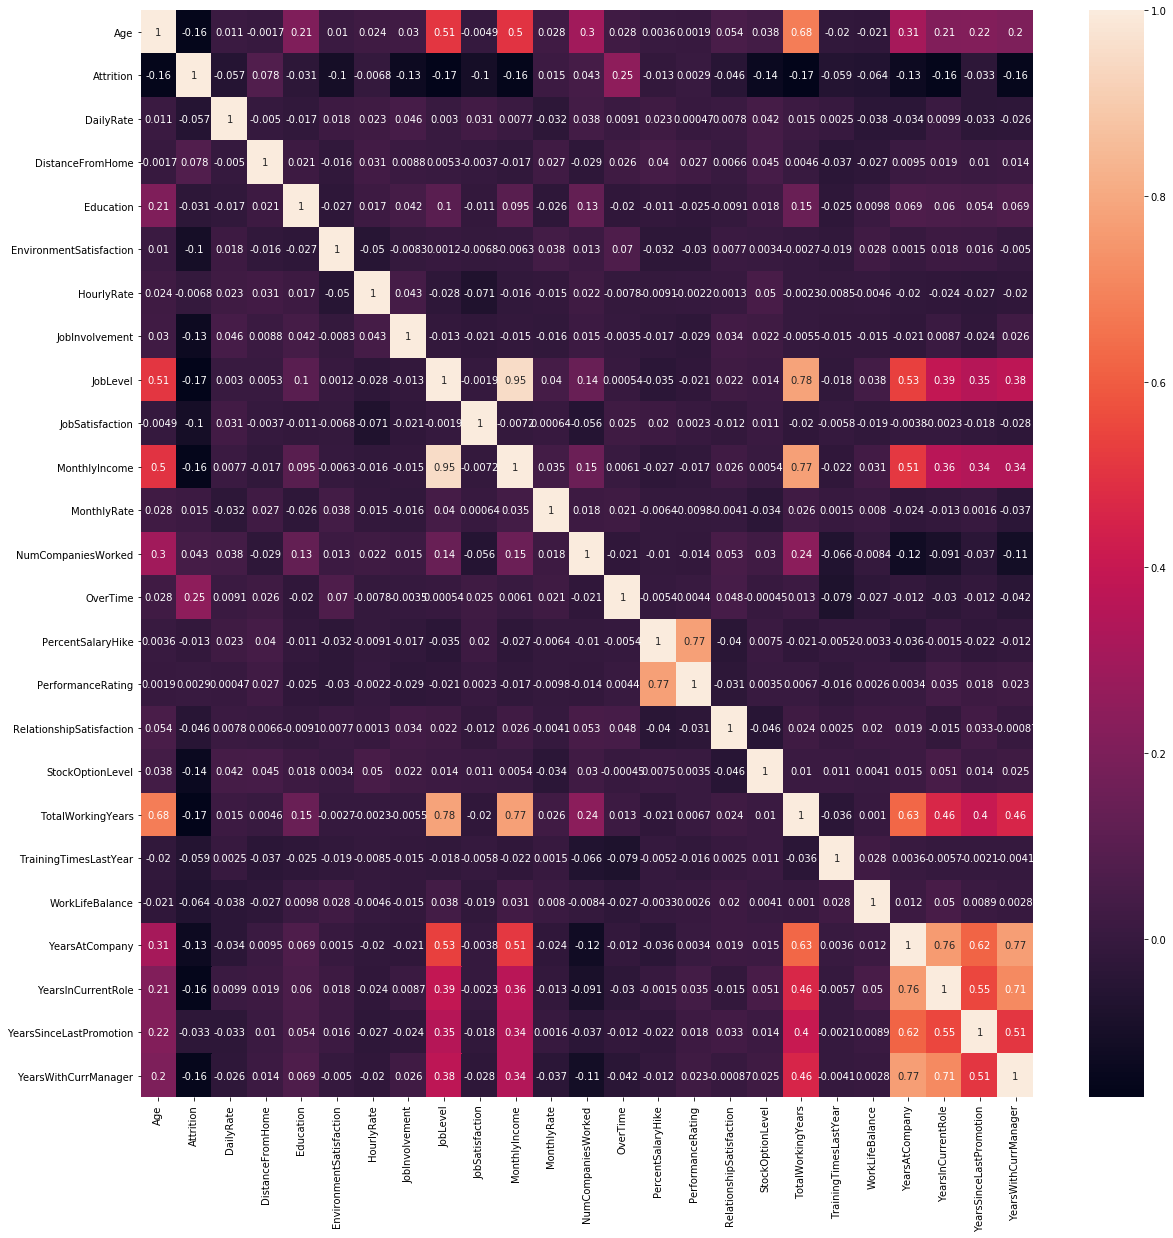

In [109]:
correlations = employee_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations,
           annot=True)

- Job level is strongly correlated with total working hours
- Monthly income is strongly correlated with Job level
- Monthly income is strongly correlated with total working hours
- Age is stongly correlated with monthly income

#### AGE vs Attrition

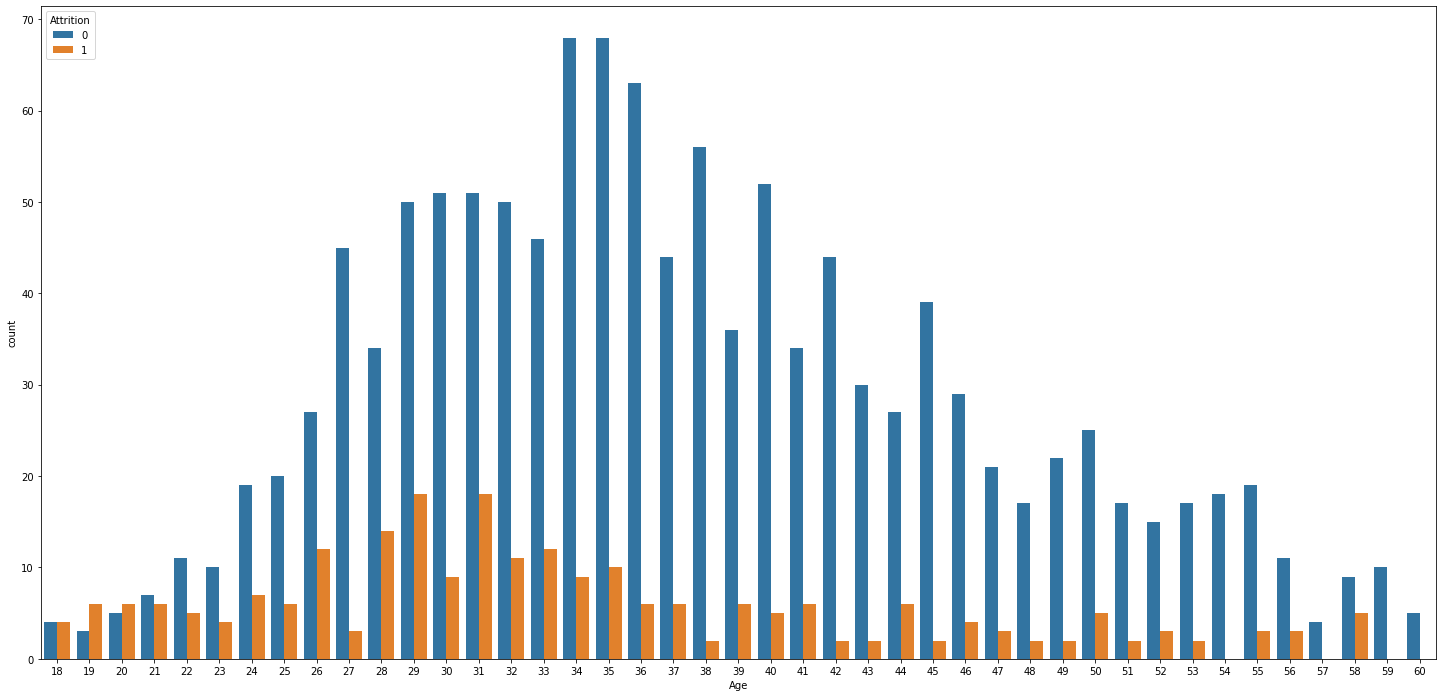

In [114]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age',
              hue='Attrition',
             data=employee_df)

#### Attrition vs Other Attributes

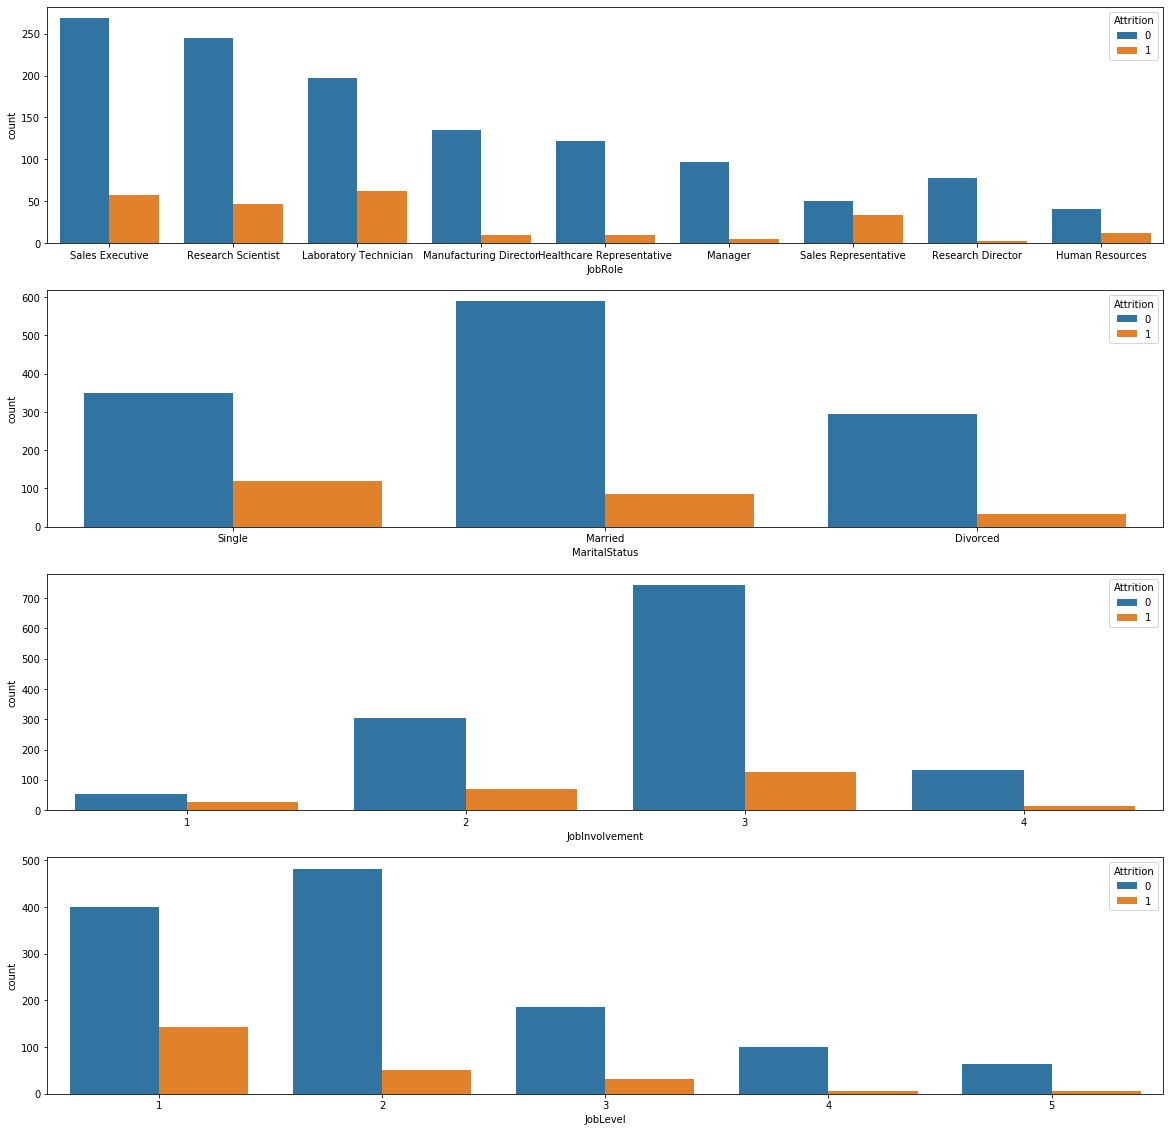

In [115]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

- Single employees tend to leave compared to married and divorced
- Sales Representitives tend to leave compared to any other job 
- Less involved employees tend to leave the company 
- Less experienced (low job level) tend to leave the company 

Text(0.5, 0, 'Distance From Home')

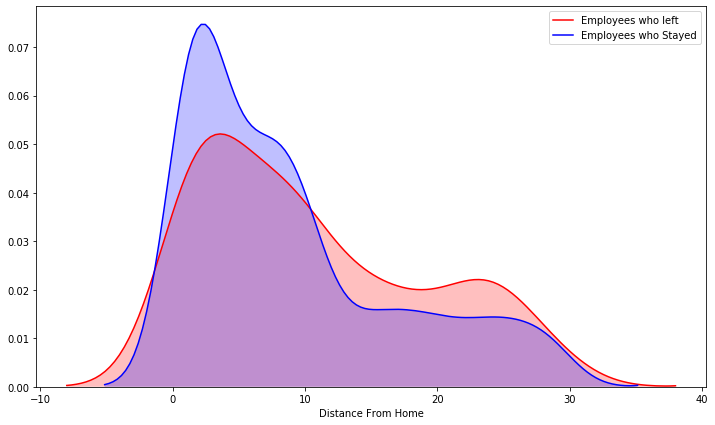

In [116]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

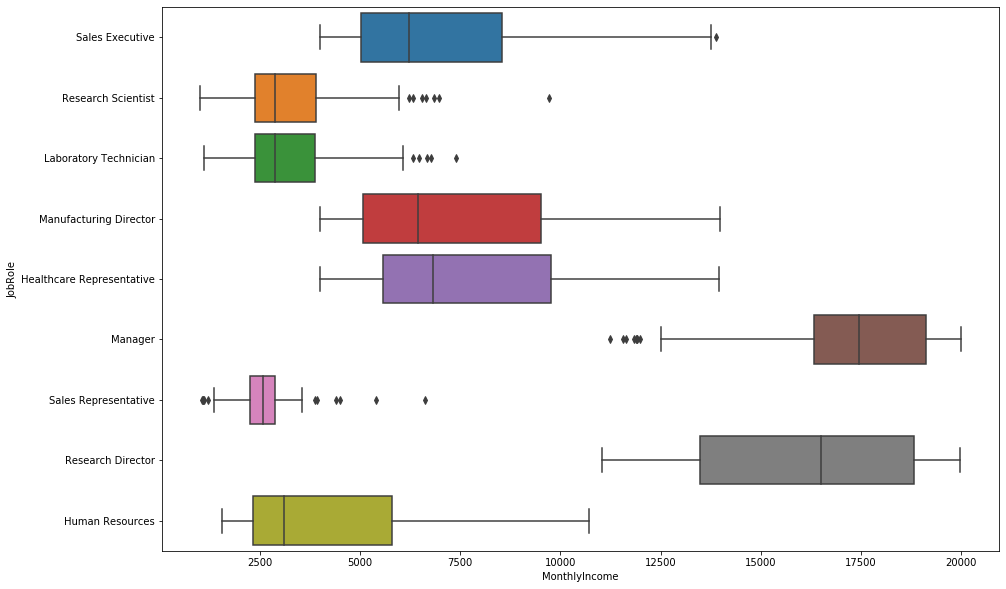

In [117]:
# Let's see the monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

### Data Cleaning

#### Converting catgorical to numerical (One Hot Encoding)

In [155]:
x_cat = employee_df[employee_df.dtypes[employee_df.dtypes=='object'].index]

In [156]:
x_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [162]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(x_cat).toarray()
X_cat = pd.DataFrame(X_cat)

#### Splitting the data into train and test

In [170]:
X_numerical = employee_df[employee_df.dtypes[employee_df.dtypes != 'object'].index].drop('Attrition',axis=1)

In [172]:
X_all = pd.concat([X_cat, X_numerical],
                 axis=1)

In [173]:
X_all.shape

(1470, 50)

#### Scaling

In [177]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
y = employee_df['Attrition']

#### Splitting the data into train and test

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [180]:
X_train.shape

(1102, 50)

### Modelling

#### Train and evaluate logistic regression classifier

In [182]:
lg_model = LogisticRegression()

In [183]:
lg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
y_pred = lg_model.predict(X_test)

In [186]:
print('Accuracy {} %'.format(100*accuracy_score(y_pred,y_test)))

Accuracy 90.21739130434783 %


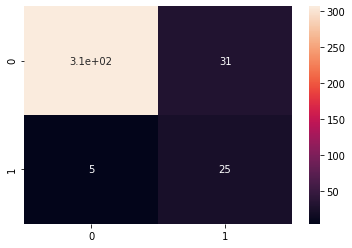

In [188]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       312
           1       0.83      0.45      0.58        56

    accuracy                           0.90       368
   macro avg       0.87      0.72      0.76       368
weighted avg       0.90      0.90      0.89       368



#### Train and evaluate random forest  classifier

In [192]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [194]:
y_pred = rf_model.predict(X_test)

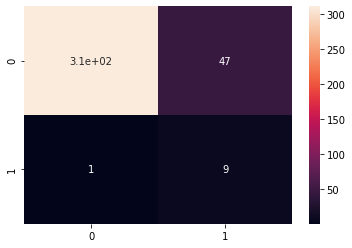

In [195]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       312
           1       0.90      0.16      0.27        56

    accuracy                           0.87       368
   macro avg       0.88      0.58      0.60       368
weighted avg       0.87      0.87      0.83       368



#### Train and evaluate deep learning model

In [204]:
model = tf.keras.models.Sequential()

In [205]:
model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [206]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 276,501
Trainable params: 276,501
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [208]:
epoch_hist = model.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8040
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8439
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8702
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8911
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.8984
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.9002
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9138
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9120
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9183
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2729 - accuracy: 0.8829
Epoch 11/

23/23 [==============================] - 0s 3ms/step - loss: 1.2673e-04 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 4ms/step - loss: 1.2175e-04 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 4ms/step - loss: 1.1767e-04 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 4ms/step - loss: 1.1394e-04 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 5ms/step - loss: 1.0934e-04 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 3ms/step - loss: 1.0548e-04 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 3ms/step - loss: 1.0184e-04 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 3ms/step - loss: 9.8128e-05 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 3ms/step - loss: 9.6696e-05 - accuracy: 1.0000
Epoch 90/100
23/23 [==============================] - 0s 3ms/step - loss: 9.2

In [209]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

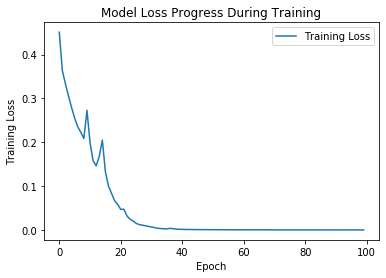

In [212]:
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

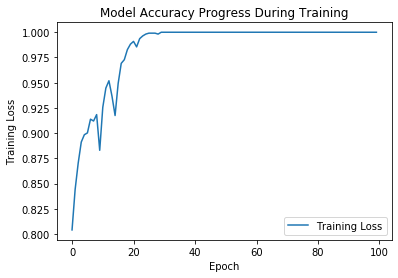

In [213]:
plt.plot(epoch_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

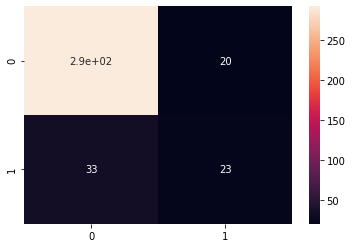

In [214]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       312
           1       0.53      0.41      0.46        56

    accuracy                           0.86       368
   macro avg       0.72      0.67      0.69       368
weighted avg       0.84      0.86      0.85       368



### Conclusion

In [ ]:
Here we can see that all the models showing poor performance in classifying the class 1:
- We can try to optimize the neural network architecture (need )